# Исследование гипотез для увеличения выручки интернет-магазина

***Описание и цели проекта***

Для целей приоритезации гипотез по увеличению выручки интернет-магазина и оценки результатов А/B-теста изучим следующие имеющиеся в распоряжении данные: 
- Данные о рассматриваемых гипотезах: описание гипотезы, охват пользователей по 10-балльной шкале, влияние на пользователей по 10-балльной шкале, уверенность в гипотезе по 10-балльной шкале, затраты ресурсов на проверку гипотезы по 10-балльной шкале
- Данные о заказах: идентификатор заказа, идентификатор пользователя, дата заказа, выручка от заказа, группа A/B-теста, в которую попал заказ
- Данные о пользователях: дата, группа A/B-теста, количество пользователей в указанную дату в указанной группе A/B-теста

На основаниии указанных данных:
1. Приоритезируем гипотезы с использоватием методов ICE и RICE
2. Проанализируем результаты A/B-теста, для этого:
- Произведем предобработку данных
- Построим график кумулятивной выручки по группам
- Построим графики кумулятивного среднего чека по группам и относительного изменения кумулятивного среднего чека группы B к группе A
- Построим графики кумулятивного среднего количества заказов на посетителя по группам и относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
- Построим точечный график количества заказов по пользователям и посчитаем 95-й и 99-й перцентили
- Построим точечный график стоимостей заказов и посчитаем 95-й и 99-й перцентили
- Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами по «сырым» данным
- Посчитаем статистическую значимость в среднем количестве заказов на посетителя и в среднем чеке заказа между группами по «очищенным» данным
- Сделаем выводы и примем решение по результатам теста

## Приоритизация гипотез

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data_hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 110
data_hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data_hypothesis.columns = [x.lower() for x in data_hypothesis.columns]
data_hypothesis.columns 

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [4]:
# Применим фреймворк ICE
data_hypothesis['ICE'] = round(data_hypothesis['impact'] * data_hypothesis['confidence'] / data_hypothesis['efforts'], 2)
data_hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [5]:
# Применим фреймворк RICE
data_hypothesis['RICE'] = round(data_hypothesis['reach'] * data_hypothesis['impact'] * data_hypothesis['confidence'] / data_hypothesis['efforts'], 2)
data_hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Приоритезация методом RICE показала отличный от метода ICE результат - лидерами стали гипотезы о добавлении формы подписки на все основные страницы (на третьем месте при использовании ICE), о добавлении блоков рекомендаций на сайт интернет-магазина(на 5-м) и о добавлении двух новых каналов привлечения трафика(на 2-м). Основная причина в параметре REACH, который используется при подсчете методом RICE и отсутствует в ICE. Данный параметр показывает, скольких пользователей затронет изменение. В рассматриваемом случае, несмотря на то, что гипотезы о запуске акции со скидкой на товар в день рождения, о добавлении двух новых каналов привлечения и о добавлении формы подписки на все основные страницы показали наибольшее влияние на пользователей, учет охвата аудитории методом RICE изменил тройку лидеров.

## Анализ A/B-теста

In [6]:
# Создадим функцию для первичного анализа датафреймов
def primary_analysis(df):
    return  df.info(), f'Количество дубликатов: {df.duplicated().sum()}', f'Количество пропусков: {df.isna().sum().sort_values(ascending = False)}', df.head() 

In [7]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
primary_analysis(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


(None,
 'Количество дубликатов: 0',
 'Количество пропусков: transactionId    0\nvisitorId        0\ndate             0\nrevenue          0\ngroup            0\ndtype: int64',
    transactionId   visitorId        date  revenue group
 0     3667963787  3312258926  2019-08-15     1650     B
 1     2804400009  3642806036  2019-08-15      730     B
 2     2961555356  4069496402  2019-08-15      400     A
 3     3797467345  1196621759  2019-08-15     9759     B
 4     2282983706  2322279887  2019-08-15     2308     B)

Пропуски и дубликаты отсутствуют

In [8]:
# Скорректируем названия столбцов
orders = orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [9]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
primary_analysis(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


(None,
 'Количество дубликатов: 0',
 'Количество пропусков: date        0\ngroup       0\nvisitors    0\ndtype: int64',
          date group  visitors
 0  2019-08-01     A       719
 1  2019-08-02     A       619
 2  2019-08-03     A       507
 3  2019-08-04     A       717
 4  2019-08-05     A       756)

Пропуски и дубликаты отсутствуют

In [10]:
# Изменим тип данных 'object' в столбцах с датами обоих датафреймов
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### График кумулятивной выручки по группам

In [11]:
# Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [12]:
# получим агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )
# получим агрегированные кумулятивные по дням данные о пользователях
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
# объединим кумулятивные данные в одной таблице 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


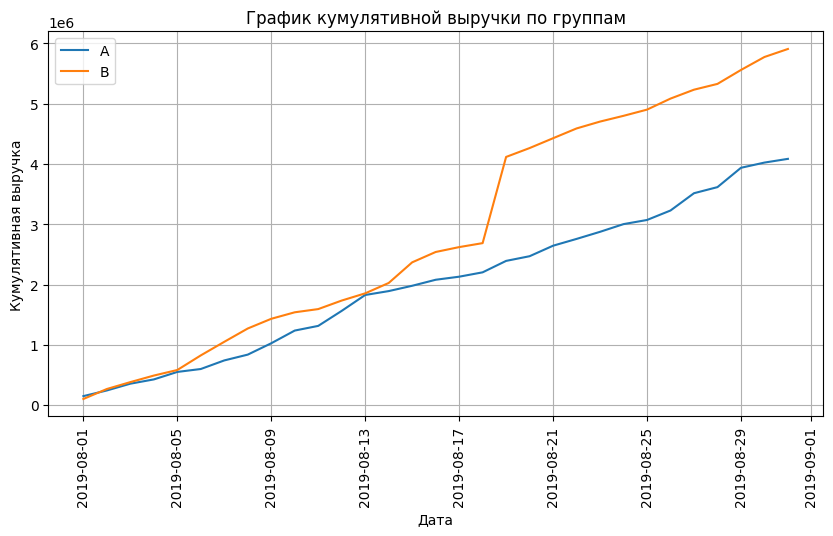

In [13]:
# построим графики кумулятивной выручки по дням и группам A/B-тестирования

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize = (10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title('График кумулятивной выручки по группам') 
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Кумулятивная выручка равномерно растет в течение почти всего рассматриваемого периода, при этом выручка группы B стабильно выше. Однако 19.08.19 в группе B произошел резкий скачок кумулятивной выручки, что может свидетельствовать о наличии выбросов в данных - произошел скачок количества, либо суммы заказов.

### График кумулятивного среднего чека по группам

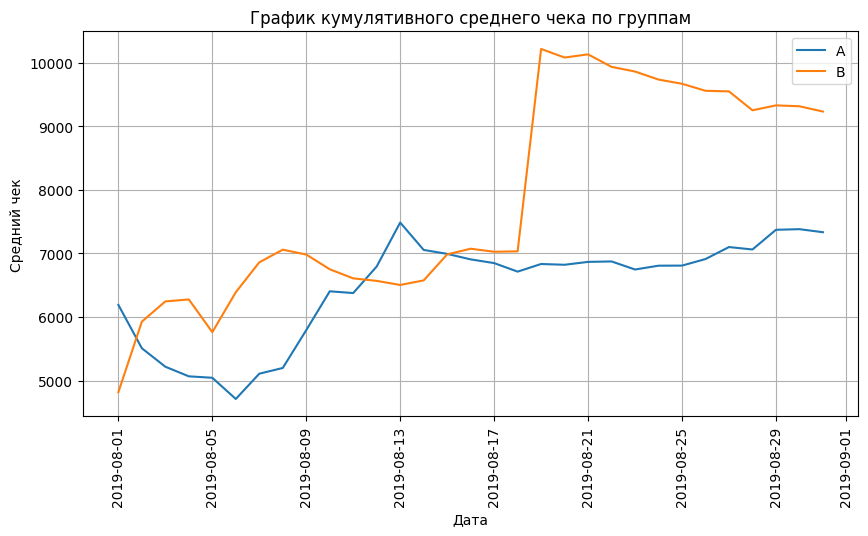

In [14]:
plt.figure(figsize = (10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам') 
plt.xticks(rotation = 90)
plt.grid()
plt.show()

На графике также видим всплеск в размере среднего чека 19.08.19 Средний чек установился в конце теста и у группы В он стабильно выше группы А (за исключением короткого промежутка между 11.08.19 и 15.08.19), однако выброс в виде нетипично дорого заказа 19.08.19 мог оказать влияние на итоговый результат, поэтому необходима проверка на очищенных от выбросов данных.

### График относительного изменения кумулятивного среднего чека группы B к группе A

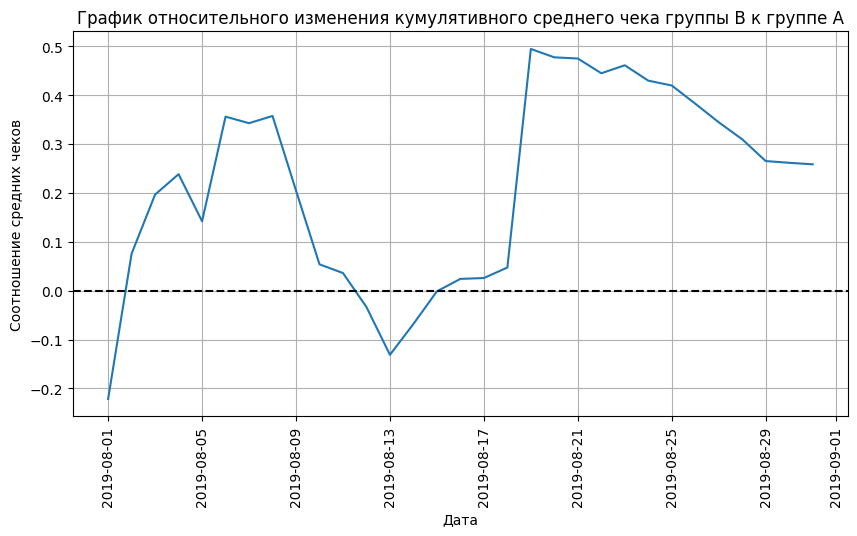

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize = (10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')  
plt.xlabel('Дата')
plt.ylabel('Соотношение средних чеков')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A') 
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Аналогичная картина наблюдается на графике относительного изменения кумулятивного среднего чека группы B к группе A - средний чек группы B больше группы А  на большей части рассматриваемого промежутка времени, за исключением первых дней периода и промежутка между 11.08.19 и 15.08.19. Резкие скачки также могут свидетельствовать о наличии выбросов.

### График кумулятивного среднего количества заказов на посетителя по группам

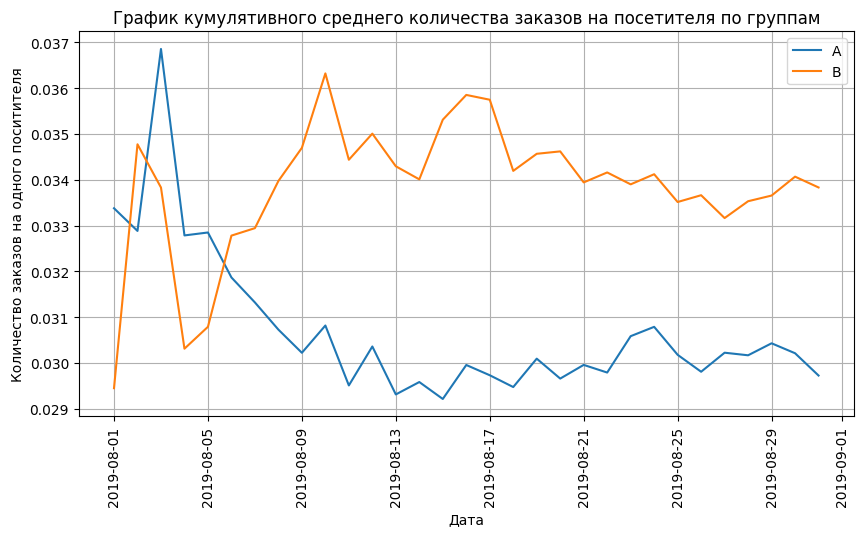

In [39]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize = (10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Количество заказов на одного поситителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам') 
plt.xticks(rotation = 90)
plt.grid()
plt.show()

После 05.08.19 среднее количество заказов на одного посетителя группы B вырвалось вперед и колеблется вокруг значения 0,034, как и значение группы А колеблется вокруг 0,03

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

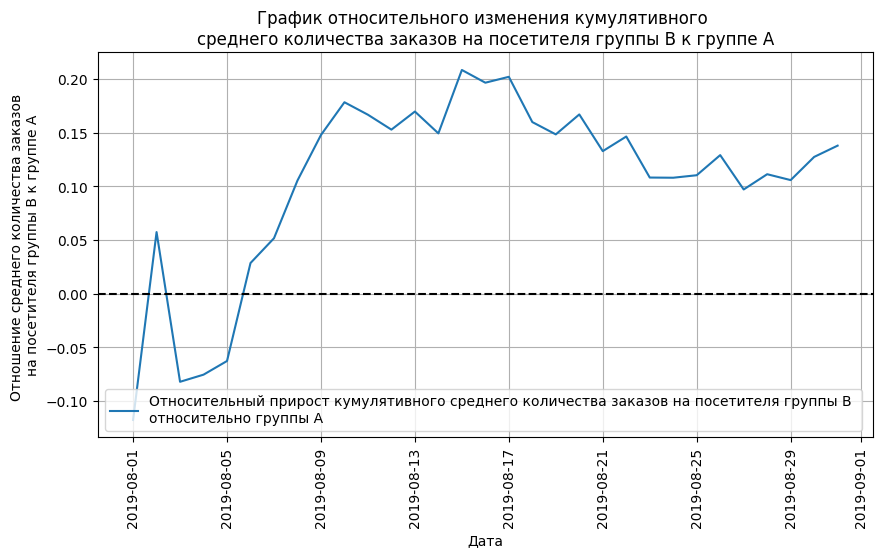

In [40]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize = (10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B \nотносительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего количества заказов \nна посетителя группы B к группе A')
plt.title('График относительного изменения кумулятивного \nсреднего количества заказов на посетителя группы B к группе A') 
plt.xticks(rotation = 90)
plt.grid()
plt.show()


В начале теста группа B в основном проигрывала группе А по количеству заказов на посетителя, однако после 05.08.19 группа В вырвалась вперед и продолжает лидировать.

### Точечный график количества заказов по пользователям

In [18]:
# Посчитаем количество заказов в разбивке по пользователям
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


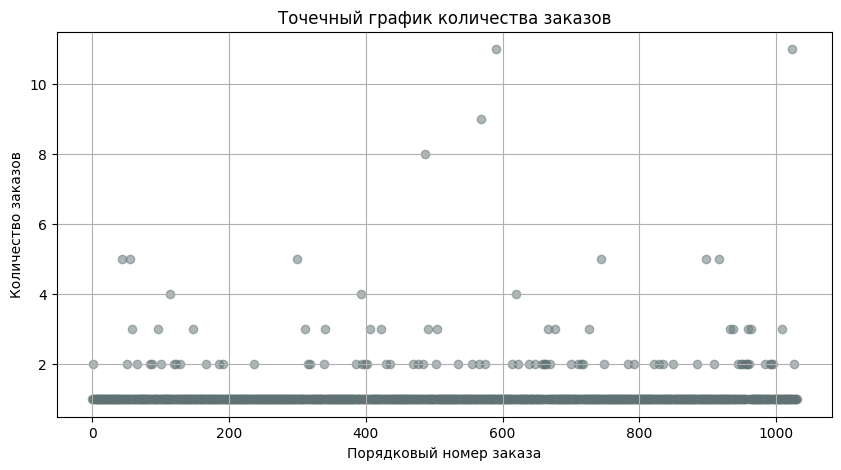

In [35]:
# Порстроим точечный график
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize = (10, 5))
plt.scatter(x_values, ordersByUsers['orders'], alpha = 0.5, color = '#607274') 
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов') 
plt.grid()
plt.show()

На графике присутствует большое количество пользователей с 2 заказами, а также отдельные выбросы - 8-11 заказов. Необхолимо определить границу, определяющую границу, при превышении которых данные будут считаться выбросом.

In [20]:
# Проверим разброс в количестве закащов методом describe
ordersByUsers['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

75% пользователей сделали 1 заказ, максимальное количество - 11. Для определения границы отсечение посчитаем 95 и 99 перцентили.

### 295-й и 99-й перцентили количества заказов на пользователя

In [21]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5 % пользователей совершили больше 2 заказов, а не более 1 % - более 4. Будем считать выбросами более 2 заказов.

### Точечный график стоимостей заказов

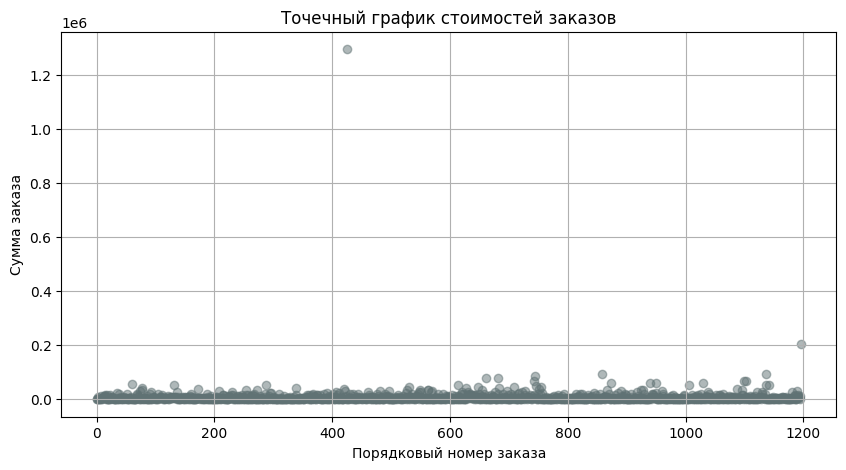

In [36]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize = (10, 5))
plt.scatter(x_values, orders['revenue'], alpha = 0.5, color = '#607274')
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Сумма заказа')
plt.title('Точечный график стоимостей заказов') 
plt.grid()
plt.show()

На графике видим отдельные заказы, стоимость которых значительно выше стоимости остальных. Такие заказы способны исказить данные.

In [23]:
# Дополнительно рассмотрим разброс значений методом describe
print(orders['revenue'].describe())

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64


75% заказов не превышают 8 290 руб., при этом максимальное значение составило 1 294 500 руб.

### 95-й и 99-й перцентили стоимостей заказов

In [24]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5 % заказов превысили 28 000 руб., а не более 1 % - 58 233 руб. Выберем 95 процентиль в качестве границы отсечения нормальных значений.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [25]:
# Подготовим данные для теста
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsACummulative = visitorsAggregated[visitorsAggregated['group'] == 'A'][['date', 'visitors']]
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsAggregated[visitorsAggregated['group'] == 'B'][['date', 'visitors']]
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersACummulative = ordersAggregated[ordersAggregated['group'] == 'A'][['date', 'transaction_id', 'revenue']]
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBCummulative = ordersAggregated[ordersAggregated['group'] == 'B'][['date', 'transaction_id', 'revenue']]
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [26]:
# Для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. Для этого создадим функцию
def orderbyuser(group):
    datagrouped = orders[orders['group'] == group].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
    datagrouped.columns = ['visitor_id', 'orders']
    return datagrouped

In [27]:
# Применим функцию к обоим группам
ordersByUsersA = orderbyuser('A')
ordersByUsersB = orderbyuser('B')

In [28]:
# Создадим переменные, в которых пользователям из разных групп будет соответствовать количество заказов

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 


Сформулируем нулевую гипотезу: различий в среднем количестве заказов между группами нет. Альтернативная гипотеза: различия в среднем количестве заказов есть. 

In [29]:
# Применим статистический критерий Манна-Уитни к полученным выборкам

print('P-value составляет:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего числа заказов группы B составляет:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value составляет: 0.017
Относительный прирост среднего числа заказов группы B составляет: 0.138


При уровне статистической значимости 0,05 p-value в размере 0,017 позволяет отвергнуть нулевую гипотезу в пользу альтернативной - по «сырым» данным  различия в среднем количестве заказов между группами есть. Среднее количество заказов группы В на 13,8 % больше группы А.

###  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным 

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [30]:
print('P-value составляет:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B составляет:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value составляет: 0.729
Относительный прирост среднего чека группы B составляет: 0.259


При уровне статистической значимости 0,05 p-value в размере 0,729 позволяет не отвергать нулевую гипотезу в пользу альтернативной, т.е. по «сырым» данным различий в среднем чеке заказа между группами нет. При этом чек группы В на 25,9 % больше группы А.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил больше 2-х заказов или на сумму более 28 000 руб. исходя из значения 95-го перцентиля - 2 заказа и 28 000 руб. Это позволит отсечь 5 % пользователей с наибольшим числом заказов, а также 5 % пользователей с наиболее дорогими заказами.

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape[0]) 

74


Итого 74 пользователя, которых мы принимаем за аномальных.

In [32]:
# Очистим данные от аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Сформулируем нулевую гипотезу: различий в среднем количестве заказов между группами нет. Альтернативная гипотеза: различия в среднем количестве заказов есть. 

In [33]:
# Применим статистический критерий Манна-Уитни к очищенным данным по количеству заказов одного пользователя
print('P-value составляет:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B составляет:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value составляет: 0.013
Относительный прирост среднего числа заказов группы B составляет: 0.173


Результат теста по количеству заказов не изменился: при уровне статистической значимости 0,05 p-value в размере 0,013 позволяет отвергнуть нулевую гипотезу в пользу альтернативной - по «очищенным» данным  различия в среднем количестве заказов между группами есть. Среднее количество заказов группы В на 17,3 % больше группы А.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [34]:
# Применим статистический критерий Манна-Уитни к очищенным данным по среднему чеку
print(
    'P-value составляет:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост среднего чека группы B составляет:',"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value составляет: 0.738
Относительный прирост среднего чека группы B составляет: -0.020


Результат теста не изменился: при уровне статистической значимости 0,05 p-value в размере 0,738 позволяет не отвергать нулевую гипотезу в пользу альтернативной, т.е. по «очищенным» данным различий в среднем чеке заказа между группами нет. Однако средний чек группы В оказался на 2 % меньше группы А.

### Результаты

- Есть статистически значимое различие между группами по среднему количеству заказов как по "сырым", так и по "очищенным данным"
- Нет статистически значимого различия между группами по среднему чеку одного пользователя как по "сырым", так и по "очищенным данным"
- График различия среднего количества заказов между группами показывает, что результаты группы B стабильно установились на уровне выше группы A 
- График различия среднего чека показывает, что результаты группы B лучше группы A и существенная тенденция к ухудшению не наблюдается
- Исходя из полученных данных тест следует остановить и признать победу группы B - несмотря на отсутствие статистически значимой разницы между группами в среднем чеке,  статистически значимое превосходство в количестве заказов положительно повлияет на рост выручки интернет-магазина.
